In [1]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

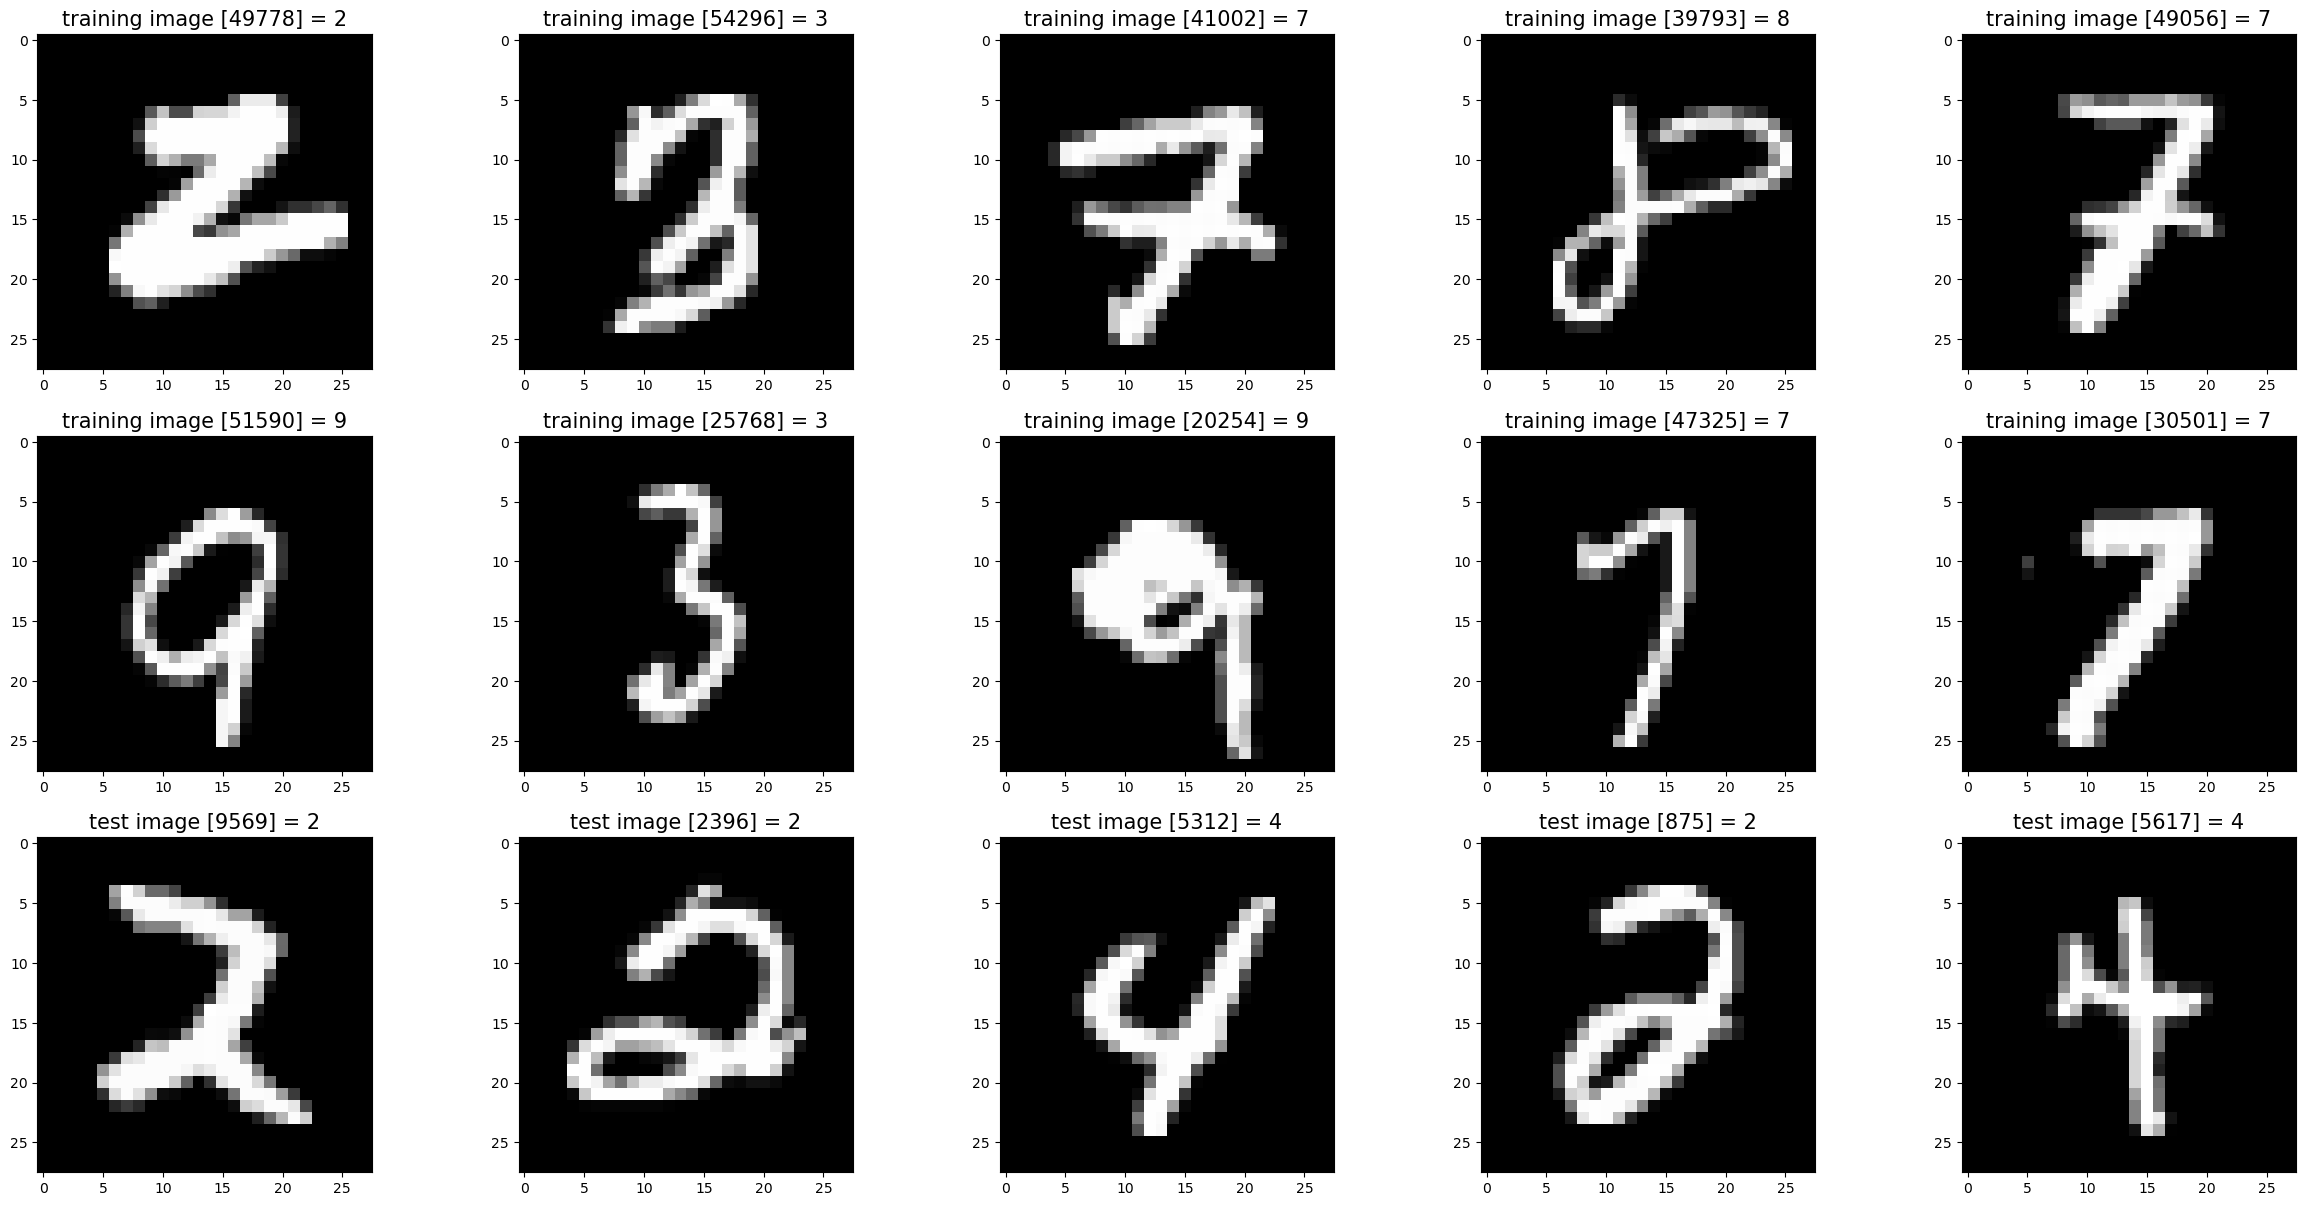

In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data/'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [ ]:
print("Train Images:{0}".format(len(x_train)))
print("Train Labels:{0}".format(len(y_train)))

print("Test Images:{0}".format(len(x_test)))
print("Test Labels:{0}".format(len(y_test)))

Train Images:60000
Train Labels:60000
Test Images:10000
Test Labels:10000


In [4]:
# Flatten the array
x_train_flat = np.array(x_train).reshape(len(x_train), 28*28 ) 
x_train_flat = x_train_flat.astype('float32') / 255

x_test_flat = np.array(x_test).reshape(len(x_test), 28*28 ) 
x_test_flat = x_test_flat.astype('float32') / 255


In [5]:
x_test_flat.shape

(10000, 784)

# Train

In [6]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Fit a linear regression model on the training set
model = LogisticRegression(max_iter=1000).fit(x_train_flat, y_train)
print (model)

LogisticRegression(max_iter=1000)


# Evaluate Model

In [7]:
predictions = model.predict(x_test_flat)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' , y_test[:10])

Predicted labels:  [7 2 1 0 4 1 4 9 6 9]
Actual labels   :  array('B', [7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

print("\nClassification Report for Test Set:")
print(classification_report(y_test, predictions))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [9]:
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix for Test Set:
[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]


# Other Classifers

In [10]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    #("SVC", SVC(kernel='linear')),
    ("SVC", SVC()),
    ("Random Forest", RandomForestClassifier(n_estimators=100,random_state=1234)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
]

In [11]:
for clf_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(x_train_flat, y_train)

    # Make predictions
    test_predictions = classifier.predict(x_test_flat)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions, average='macro')

    # Print evaluation metrics
    print(f"Classifier: {clf_name}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1 Score: {test_f1_score:.4f}")
    print("----------------------------------------------------")

    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, test_predictions))
    print("----------------------------------------------------")
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_test, test_predictions))
    print("\n" + "="*40 + "\n")

Classifier: SVC
Test Accuracy: 0.9792
Test F1 Score: 0.9791
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

----------------------------------------------------

Confusion Matrix for Test Set:
[[ 973

# Hyperparameter Tuning RFC with Grid Search

In [15]:
rf = RandomForestClassifier(random_state=1234)
rf_params = {"n_estimators":[50,100,300],
             "max_depth": [3,5,7],
             "max_features": [2,4,6,8],
             "min_samples_split": [2,4,6],
             }

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_cv_model.fit(x_train_flat, y_train)

In [14]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 4,
 'n_estimators': 300}

In [17]:
rf_retuned = RandomForestClassifier(random_state=1234, max_depth=7, max_features=8, min_samples_split=4, n_estimators=300).fit(x_train_flat, y_train)

In [18]:
# Make predictions
rf_retuned_predictions = rf_retuned.predict(x_test_flat)

# Calculate accuracy
rf_retuned_accuracy = accuracy_score(y_test, rf_retuned_predictions)
rf_retuned_f1_score = f1_score(y_test, rf_retuned_predictions, average='macro')

# Print evaluation metrics
print(f"Classifier: Tuned Random Forest")
print(f"Test Accuracy: {rf_retuned_accuracy:.4f}")
print(f"Test F1 Score: {rf_retuned_f1_score:.4f}")
print("----------------------------------------------------")

print("\nClassification Report for Test Set:")
print(classification_report(y_test, rf_retuned_predictions))
print("----------------------------------------------------")
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, rf_retuned_predictions))
print("\n" + "="*40 + "\n")

Classifier: Tuned Random Forest
Test Accuracy: 0.9140
Test F1 Score: 0.9128
----------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.91      0.99      0.95      1135
           2       0.94      0.90      0.92      1032
           3       0.86      0.91      0.88      1010
           4       0.92      0.89      0.91       982
           5       0.97      0.80      0.88       892
           6       0.91      0.96      0.94       958
           7       0.93      0.90      0.92      1028
           8       0.92      0.87      0.90       974
           9       0.87      0.91      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

----------------------------------------------------

Confusion Matrix for 

# Hyperparameter Tuning SCV with Grid Search

In [19]:
svc = SVC()
svc_params = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
              }

from sklearn.model_selection import GridSearchCV
svc_cv_model = GridSearchCV(svc, svc_params, cv=5, n_jobs=-1, verbose=2)
svc_cv_model.fit(x_train_flat, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


KeyboardInterrupt: 

In [ ]:
svc_cv_model.best_params_

In [ ]:
svc_retuned = SVC(max_depth=7, max_features=8, min_samples_split=6, n_estimators=300).fit(x_train_flat, y_train)

# Make predictions
svc_retuned_predictions = svc_retuned.predict(x_test_flat)

# Calculate accuracy
svc_retuned_accuracy = accuracy_score(y_test, svc_retuned_predictions)
svc_retuned_f1_score = f1_score(y_test, svc_retuned_predictions, average='macro')

# Print evaluation metrics
print(f"Classifier: Tuned SVC")
print(f"Test Accuracy: {svc_retuned_accuracy:.4f}")
print(f"Test F1 Score: {svc_retuned_f1_score:.4f}")
print("----------------------------------------------------")

print("\nClassification Report for Test Set:")
print(classification_report(y_test, svc_retuned_predictions))
print("----------------------------------------------------")
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, svc_retuned_predictions))
print("\n" + "="*40 + "\n")

# Use Trained Model

In [ ]:
# Save the trained model
modelFileName = 'models/mnist-ml.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

# Predict

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[#('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_train, y_train)
print (model)

ValueError: Found array with dim 3. LogisticRegression expected <= 2.